# Exercise 04.2

The following notebook shows the time averages of thermodynamical quantities from a numerical simulation of a system of $N$=108 particles in microcanonical ensemble whose dynamics is determined by a Lennard-Jones potential: $$ V_{LJ} = \sum_{i < j} 4 \epsilon \left [ \left (\frac{\sigma}{r_{ij}} \right )^{12} - \left (\frac{\sigma}{r_{ij}} \right )^{6} \right ] $$
Where $\epsilon$ and $\sigma$ are, respectively, the characteristic energy and distance of the system, and $r_{ij}$ is the distance between the $i^{th}$ and $j^{th}$ particles (the sum implicitly runs over all possible pairs $(i,j)$ such that $i, j \leq N$ and $i<j$).  The Hamiltonian of the system is therefore:
$$ H = \sum_{i=1}^N \frac{p_i^2}{2m} + \sum_{i < j} 4 \epsilon \left [ \left (\frac{\sigma}{r_{ij}} \right )^{12} - \left (\frac{\sigma}{r_{ij}} \right )^{6} \right ] $$ 
The quantities we are interested in studying are:
1. The kinetic energy per particle: $$\frac{ K }{N} = \frac{\sum_{i=1}^N  \frac{p_i^2}{2m} }{N} $$
2. The potential energy per particle: $$\frac{ U }{N} = \frac{ V_{LJ} }{N} $$
3. The energy per particle: $$ \frac{ E }{N} = \frac{ K }{N} + \frac{ U }{N} $$
4. The temperature of the system: $$T = \frac{2}{3} \frac{ K }{k_b N}$$
5. The pressure of the system: $$ P = \rho k_B T- \frac{1}{3V} \left \langle \sum_{i<j} r_{ij} \frac{\partial V_{LJ}}{\partial r_{ij}} \right \rangle $$

The last relation is a consequence of the virial theorem ($\rho$ is the particle density and $V$ is the volume). 
The simulation makes use of reduced units and periodic boundary conditions, explained below.

## Reduced Units
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
By reduced units we mean adimensional quantities defined from these key substitutions: $$ r^\star = \frac{r}{\sigma} $$ $$ V^\star(r^\star) = \frac{V(r)}{\epsilon} = 4 \left [ \left (\frac{1}{r^\star} \right )^{12} - \left (\frac{1}{r^\star} \right )^{6} \right ]$$ 
$$ T^\star = \frac{k_b T}{\epsilon} $$  $$ m=1 $$
The hamiltonian in such units is therefore: $$ H^\star = \sum_{i=1}^{N} \frac{p_i^{\star2}}{2} + \sum_{i < j}^N 4 \left [ \left (\frac{1}{r_{ij}^\star} \right )^{12} - \left (\frac{1}{r_{ij}^\star} \right )^{6} \right ] $$
                                                                                                
For the time being, all quantities are expressed in natural units (we drop the $\star$ for ease).  
Expressing quantities in reduced units serves two main purposes: 
1. __Naturally encodes universality:__ different systems described by the same interacting potential give the same numerical results when simulated. Only one simulation is needed to describe all of them.
2. __Avoids precision errors:__ quantities in reduced units are in the order of magnitude of unity, whereas in physical units they would be either very large or very small, close to the representation limit of the computer. Such a situation could lead to underflow or overflow. 

## Periodic boundary conditions and minimum image convention
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
One of the main difficulties of simulating physical systems is that no machine could ever simulate the infinite volume required to replicate the ideal, simple case of an isolated system. One of the solutions could be to take account of the interactions between the particles and the box, but it would require to change the model.  
Another solution, called periodic boundary conditions (pbc), overcomes this difficulty by setting the system in a cubical box of side $2L$, $[-L, L]^3$ that repeats itself in all directions to form an infinite lattice (from a topological point of view, the simulation lives on a torus). In every copy of the box, an image of the system evolves exactly as the one in the central box. The coordinates of a particle in pbc become: $$ x_i \rightarrow x_i - L \left \lfloor \frac{x_i}{L} \right \rfloor$$
Thus, when a particle exceeds the limits of the box, it pops out from the opposite side.  
By convention, we consider the particle to interact only with the closest images of the other particles: this is called minimum image convention.

Pbc solve the problem of interactions with the box, but introduce issues for __long ranged potentials__, because the non negligible interactions between one particle and its own copies makes the system sensitive to a symmetry that, in the real one, does not exist. Instead, pbc work fine for short ranged potentials, that can be truncated at a certain radius $r_c$ without introducing severe errors.  

## Initialization and equilibration
The integration algorithm used to update the system after every time-step is __Verlet algorithm__, which guarantees long time energy conservation (which is the defining condition of the microcanonical ensemble). It works as follows: 
$$ \vec{r}(t+\delta t) = 2 \vec{r}(t)-\vec{r}(t - \delta t) + \vec{a}(t) \delta t^2$$
The error of this method is in order of $\delta t^4$. The feasable value of $\delta t$ is specific to the shape of the potential and the temperatures at play.  
As one could notice, Verlet algorithm not only requires knowledge of current position and acceleration of the particle, but also its position at the previous time step. Then, for Verlet algorithm to work, the initial information must include the initial positions of the particles and their initial velocities (used to compute previous positions).  
The initial positions are a critical aspect of the simulation. Generating them at random doesn't work because there are high chances of generating very unlikely microstates that would affect the macroscopical quantities. For example, in a Lennard-Jones interactions, if some particles were generated very close to each other, they would feel an extremely high repulsive force that would give them an unrealistic kinetic energy.  
In order to avoid such issues, the particles are initialized in a crystal configuration, where the distance between each particle and the adjacent ones is given by $\sqrt[3]{\frac{1}{\rho}}$.  
The initial velocities are simply drawn by a Maxwell-Boltzmann distribution at the given temperature $T$.
$$ \rho (v_i) = \sqrt{\frac{1}{2 \pi T}}exp \left (-\frac{v_i^2}{2 T} \right ) $$
The crystal is then let free to evolve. Doing so, the energy stays approximately the same, but the temperature varies. As a consequence, it is not the case that a simulation starting at temperature $T$ will simulate a system at the same temperature in the long run. The strategy to follow is to start the simulation at a temperature $T'$ such that the equilibration temperature is the desired one, and then use this state of the system as the new starting configuration.  

## Parameters of simulation
We study the system in three different phases of matter: solid, liquid and gas. Such phases are obtained by setting the values of particle density $\rho$ and temperature $T$. $T_{therm}$ is the starting temperature empirically found such that the system thermalizes at the desired temperature. $n= 50000$ is the number of steps used to thermalize each phase. 

| Phase | $\rho$ | $T$ | $T_{therm}$ | $r_c$ | $n_{steps}$ | $\delta t$ |
| ----- | ------ | --- | ---- | ----- | ----------- | -------- |
| Solid | $1.1$  | $0.8$ | $1.55$ | $2.2$ | $5000$ | $0.001$ |
| Liquid | $0.8$ | $1.1$ | $1.98$ | $2.5$ | $5000$ | $0.0005$ |
| Gas   | $0.05$ | $1.2$ | $0.9$ | $5.0$ | $5000$| $0.0005$ |

The time step is $ \delta t = 0.0005$.
For each phase, $M=100$ blocks are simulated. $n_{steps}$ is the length of a single block for the given phase. The solid phase needs a greater $n_{steps}$ because such phase evolves more slowly, thus is more sensitive to low frequency correlations.  
The figures show, for each observable and phase, the progressive averages (averages between all the previous realizations of the quantity) with the associated errors.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

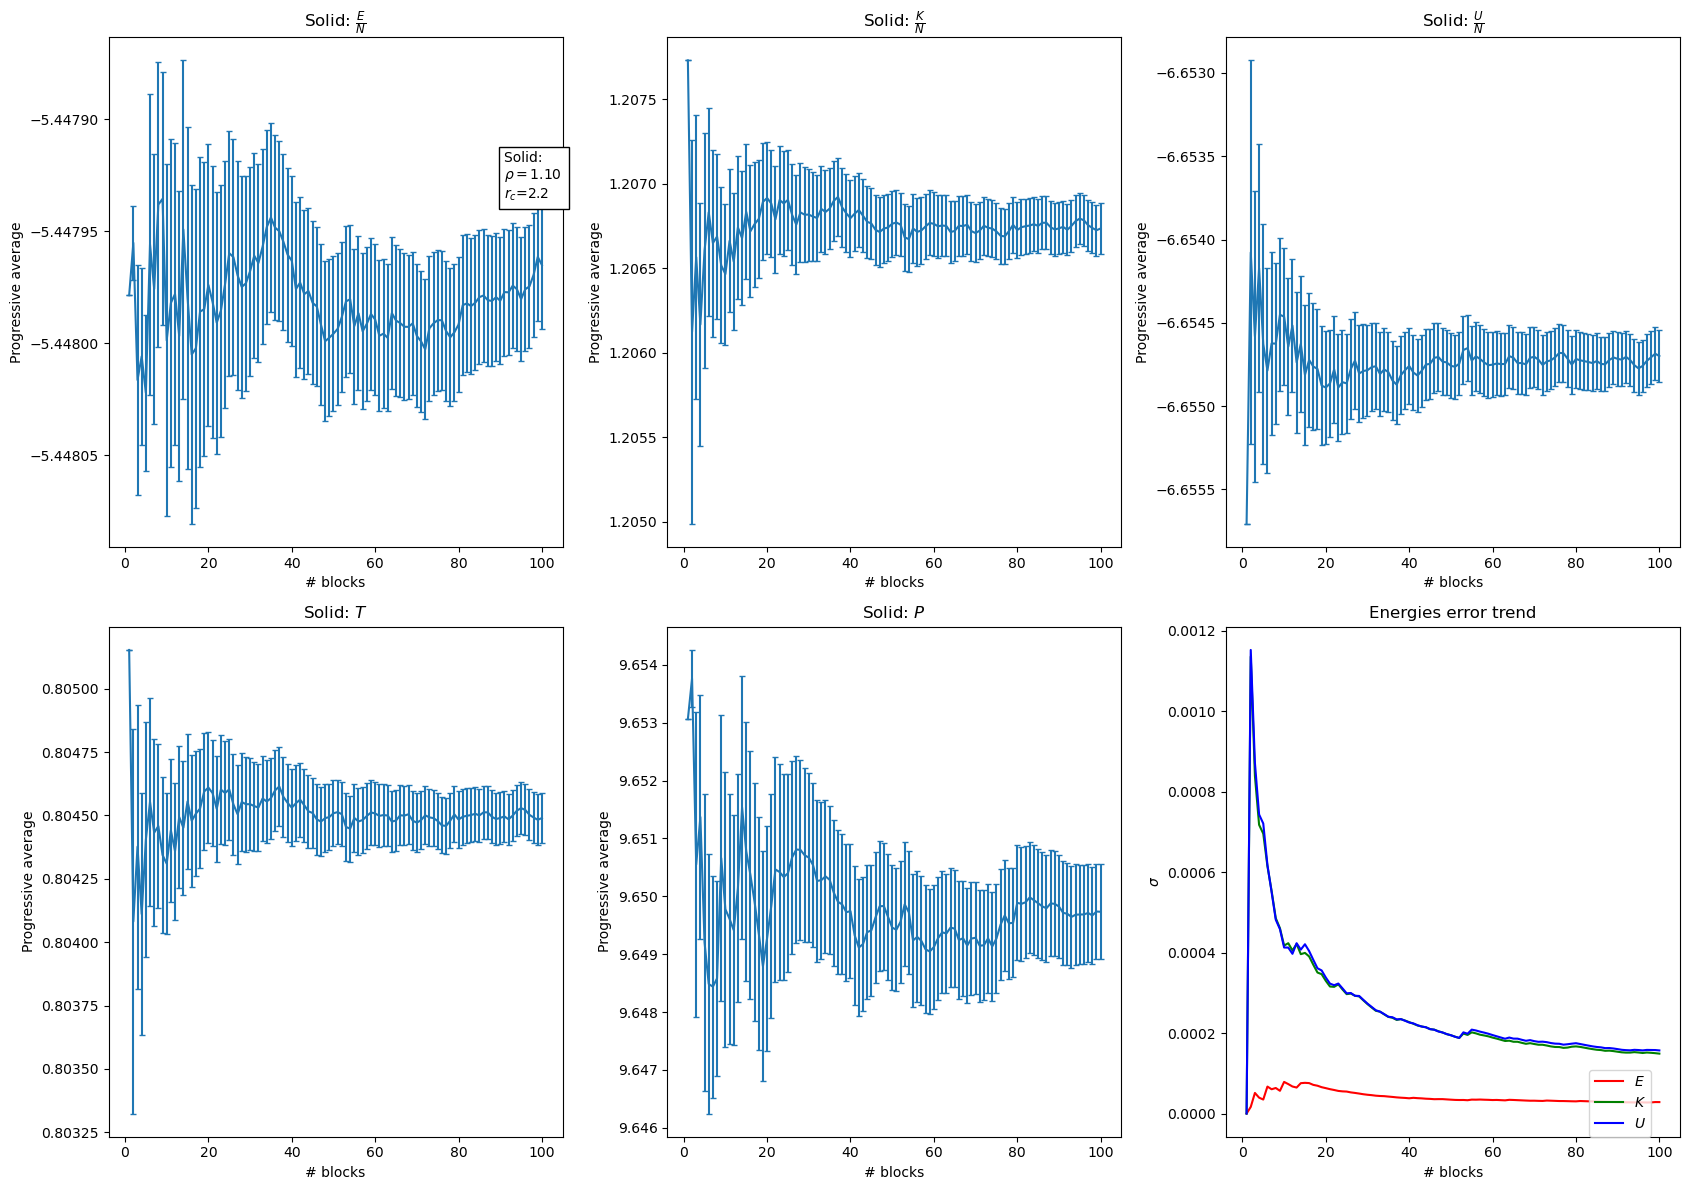

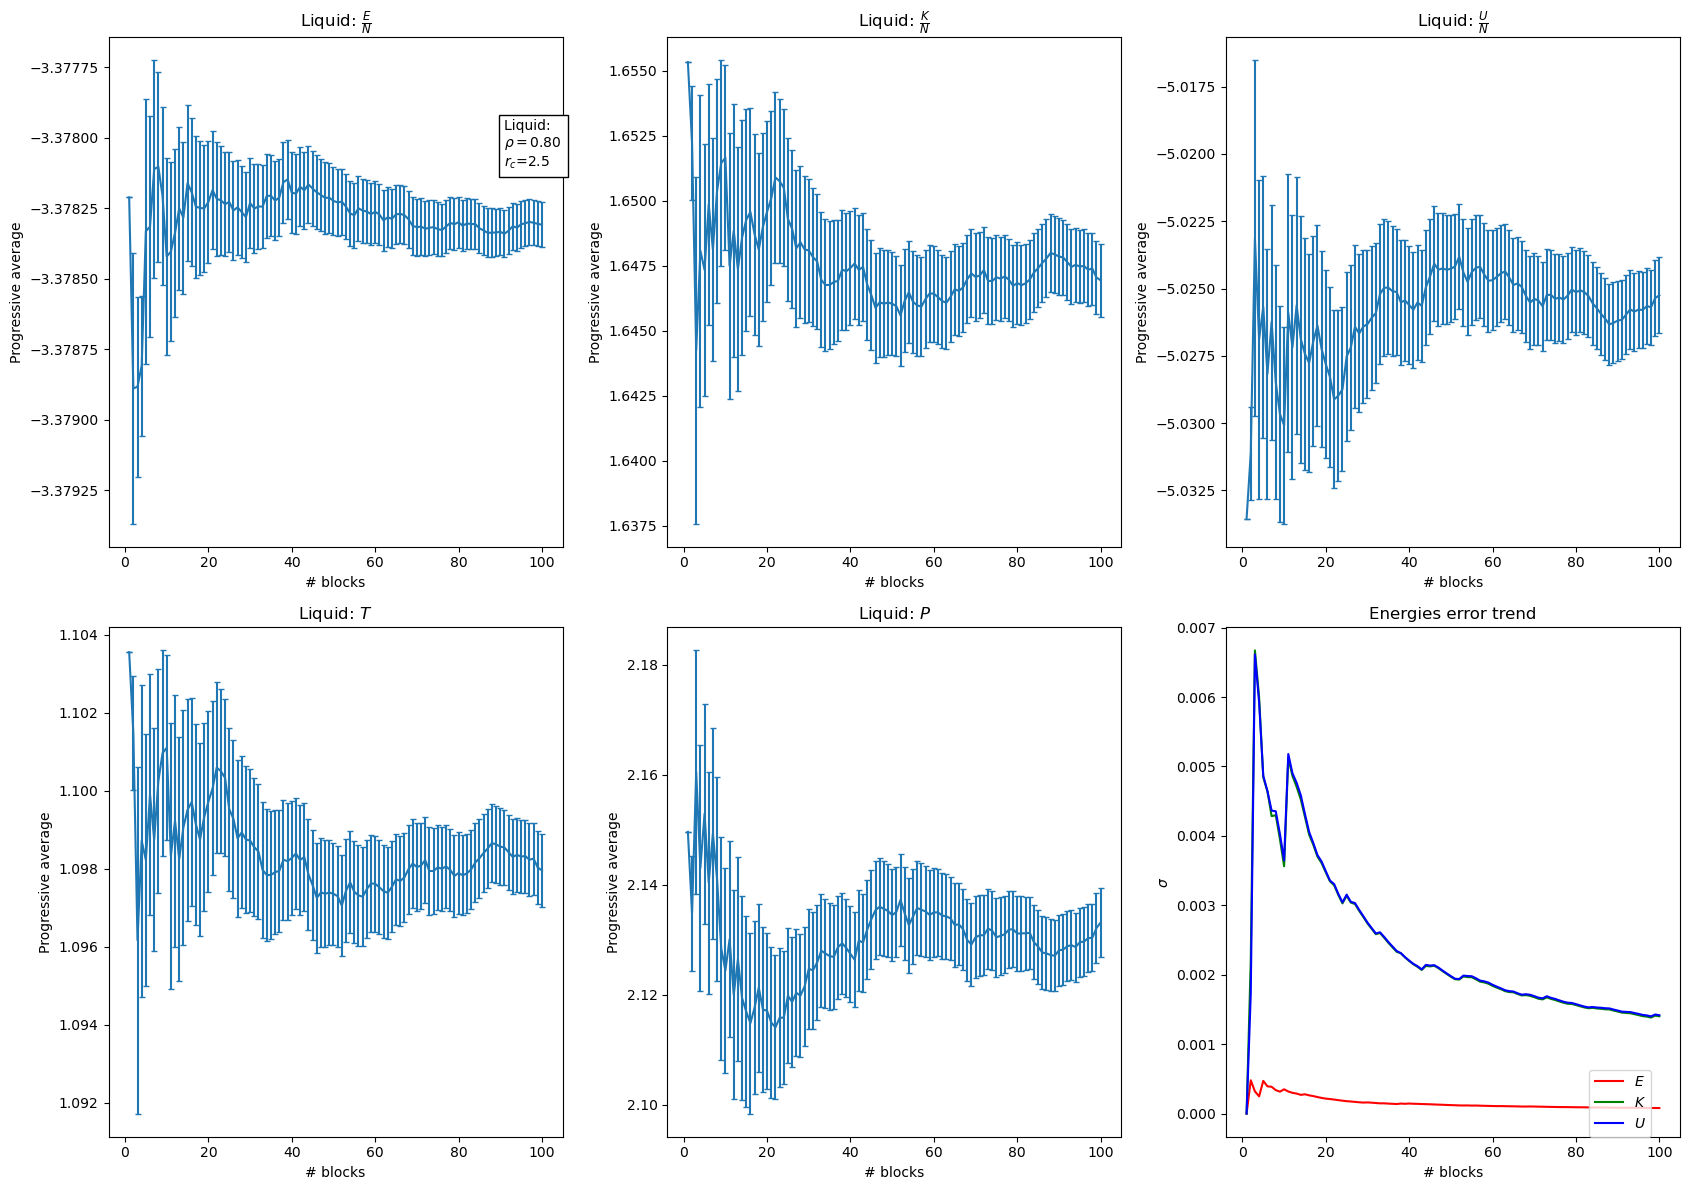

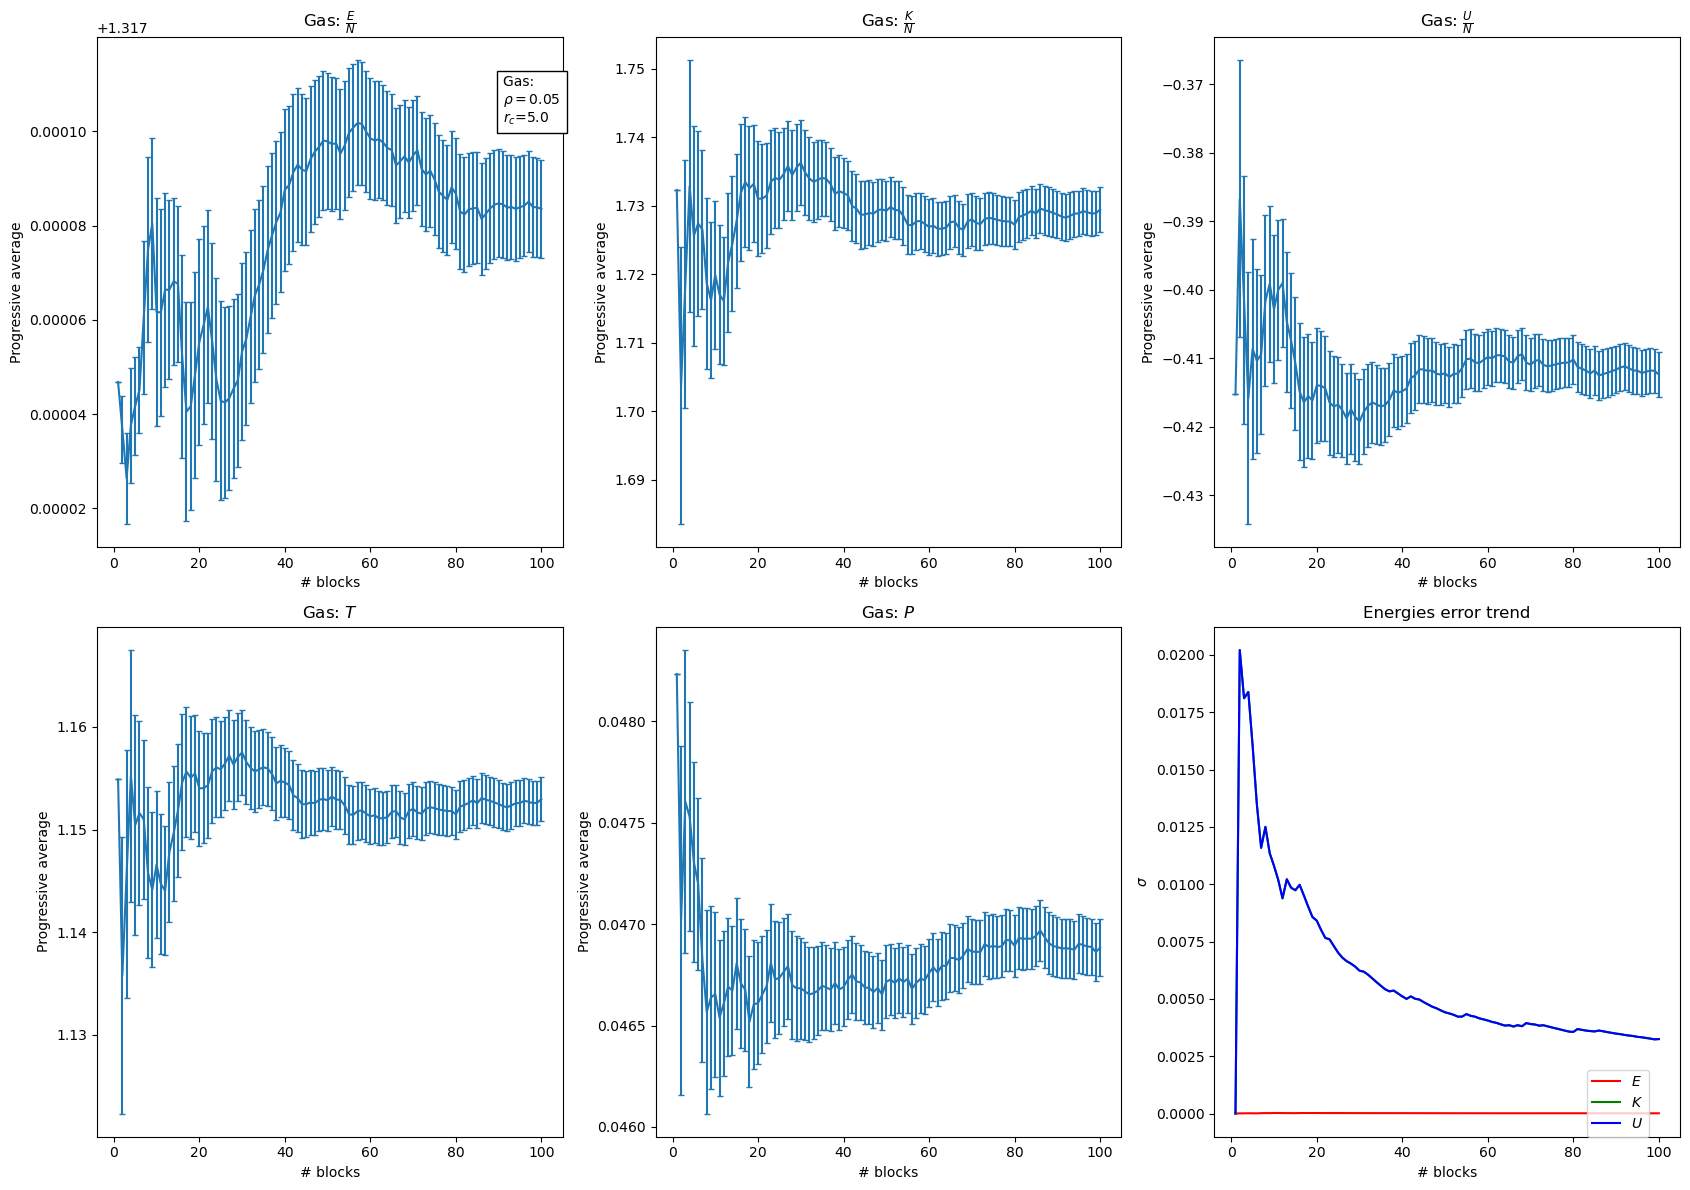

In [2]:
# Define phases of matter
phases = ["Solid", "Liquid", "Gas"]

# Loop through each phase
for i in range(3):

    # Load parameters from input file (parameters=[temperature, n of particles, density, r_cut, deltat, n blocks, nsteps per block])
    parameters = np.loadtxt(phases[i] + "/input.dat", usecols=1, skiprows=2, max_rows=7)
    N = int(parameters[5])  # Number of blocks
    #print(N)
    x = np.arange(N) + 1  # Block numbers

    # Load various data from files
    int_energy, int_en_err = np.loadtxt(phases[i] + "/total_energy.dat", usecols=(2, 3), skiprows=1, unpack=True)
    kin_energy, kin_en_err = np.loadtxt(phases[i] + "/kinetic_energy.dat", usecols=(2, 3), skiprows=1, unpack=True)
    pot_energy, pot_en_err = np.loadtxt(phases[i] + "/potential_energy.dat", usecols=(2, 3), skiprows=1, unpack=True)
    temp, temp_err = np.loadtxt(phases[i] + "/temperature.dat", usecols=(2, 3), skiprows=1, unpack=True)
    pressure, pressure_err = np.loadtxt(phases[i] + "/pressure.dat", usecols=(2, 3), skiprows=1, unpack=True)

    # Create a dummy list for the last subplot (not shown)
    dummy = [0 for i in range(N)]

    # Organize data into a list for plotting
    data = [[ [int_energy, int_en_err], [kin_energy, kin_en_err], [pot_energy, pot_en_err] ],
            [ [temp, temp_err], [pressure, pressure_err], [dummy, dummy] ]
           ]

    # Creation of figure and subplots
    fig, axx = plt.subplots(2, 3, figsize=(17, 12), tight_layout=True)

    # Titles for each plot
    titles = [[phases[i] + r": $\frac{E}{N}$", phases[i] + r": $\frac{K}{N}$", phases[i] + r": $\frac{U}{N}$"],
              [phases[i] + r": $T$", phases[i] + r": $P$", phases[i]]
             ]
    
    # Loop through each subplot
    for j in range(2):
        for k in range(3):
            #print(j," ",k)
            ax = axx[j, k]  # Current axis

            if j != 1 or k != 2:
                ax.errorbar(x, y=data[j][k][0], yerr=data[j][k][1], capsize=2.5, linestyle='-')  # Plot data with error bars
                ax.set_xlabel("# blocks")  # Set x-axis label
                ax.set_ylabel("Progressive average")  # Set y-axis label
                ax.set_title(titles[j][k])  # Set plot title
                if j==0 and k==0:
                    ax.text(x[-10], np.max(data[j][k][0]), 
                        phases[i]+": \n"+r"$ \rho $"+f"$={format(parameters[2], '.2f')}$ \n"+r"$ r_c$"+f"={format(parameters[3], '.1f')}", 
                        bbox=dict(facecolor='white', alpha=1))

            # Hide last plot in second row
            else:
                # Plot the data for different uncertainties with respective labels and colors
                ax.plot(x, data[0][0][1], label=r"$E$", color="red")  # Plot energy uncertainty with red color
                ax.plot(x, data[0][1][1], label=r"$K$", color="green")  # Plot kinetic energy uncertainty with green color
                ax.plot(x, data[0][2][1], label=r"$U$", color="blue")  # Plot potential energy uncertainty with blue color

                # Add legend to the plot at location (0.8, 0.0)
                ax.legend(loc=(0.8, 0.0))

                # Set title of the plot
                ax.set_title(r"Energies error trend")

                # Set label for x-axis
                ax.set_xlabel("# blocks")

                # Set label for y-axis with LaTeX-style formatting
                ax.set_ylabel(r"$\sigma$")


As one should expect, the energy fluctuations are much smaller than the other quantities' uncertainties. This is a consequence of energy conservation and a proof that Verlet algorithm is working correctly. The temperatures the phases thermalize at are not exactly the desired ones: at our knowledge, there is no systematic way of knowing which starting temperature will thermalize at the desired one.